In [37]:
import os
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [38]:
OUT_DIR = "S16"
os.makedirs(OUT_DIR, exist_ok=True)

In [39]:
with open("S10_af_time_series.pkl", "rb") as f:
    data = pickle.load(f)

afs = data["data"]
metas = pd.read_excel("S11_af_meta.xlsx")
weld_end = pd.read_excel("S12_weld_end.xlsx")
dwell = pd.read_excel("S13_weld_dwell.xlsx")
contact = pd.read_excel("S14_contact_start.xlsx")
loc = pd.read_excel("S15_loc.xlsx")


In [40]:
metas.columns

Index(['sample_no', 'DynoWare', 'Path', 'Filename', 'Config ID', 'Setup ID',
       'Manipulated', 'Filename 1', 'Filename 2', 'Date', 'Time',
       'Sampling rate [Hz]', 'Measuring time [s]', 'Delay time [s]',
       'Cycle time [s]', 'Cycles', 'Samples per channel', 'Cycle interval',
       'Cycle No', 'filename', 'R', 'D', 'W'],
      dtype='object')

In [41]:
metas

,sample_no,DynoWare,Path,Filename,Config ID,Setup ID,Manipulated,Filename 1,Filename 2,Date,...,Delay time [s],Cycle time [s],Cycles,Samples per channel,Cycle interval,Cycle No,filename,R,D,W
0,1,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 1.dwd,Sample 1.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 1.csv,1400,10,60
1,2,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 2.dwd,Sample 2.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 2.csv,1400,15,60
2,3,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 3.dwd,Sample 3.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 3.csv,1400,20,60
3,4,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 4.dwd,Sample 4.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 4.csv,1400,10,70
4,5,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 5.dwd,Sample 5.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 5.csv,1400,15,70
5,6,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 6.dwd,Sample 6.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 6.csv,1400,20,70
6,7,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 7.dwd,Sample 7.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 7.csv,1400,10,80
7,8,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 8.dwd,Sample 8.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 8.csv,1400,15,80
8,9,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 9.dwd,Sample 9.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 9.csv,1400,20,80
9,10,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 10.dwd,Sample 10.cfg,0,0,NaN,NaN,"Wednesday, January 01, 2025",...,0,0,1,18001,0,1,Sample 10.csv,1500,10,60


In [42]:
weld_end.columns

Index(['sample_no', 'drop_idx_chosen', 'drop_threshold', 'weld_time_end_idx',
       'weld_time_end', 'post_weld_level'],
      dtype='object')

In [43]:
dwell.columns

Index(['sample_no', 'idx_start_chosen', 'idx_end_chosen', 'threshold',
       'zoom_level', 'dwell_time_start', 'dwell_time_end',
       'dwell_time_start_idx', 'dwell_time_end_idx', 'dwell_time_actual'],
      dtype='object')

In [44]:
contact.columns

Index(['sample_no', 'shoot_idx_chosen', 'shoot_threshold',
       'contact_time_start_idx', 'contact_time_start', 'pre_contact_level',
       'contact_time_actual'],
      dtype='object')

In [45]:
loc.columns

Index(['sample_no', 'LOC1_time', 'LOC1_Fz', 'LOC1_idx', 'LOC2_time', 'LOC2_Fz',
       'LOC2_idx', 'LOC3_time', 'LOC3_Fz', 'LOC3_idx', 'LOC4_time', 'LOC4_Fz',
       'LOC4_idx', 'LOC5_time', 'LOC5_Fz', 'LOC5_idx', 'LOC6_time', 'LOC6_Fz',
       'LOC6_idx', 'LOC7_time', 'LOC7_Fz', 'LOC7_idx'],
      dtype='object')

In [46]:
comb = (
    metas.merge(weld_end, on="sample_no")
    .merge(dwell, on="sample_no")
    .merge(contact, on="sample_no")
    .merge(loc, on="sample_no")
)

In [47]:
comb.columns

Index(['sample_no', 'DynoWare', 'Path', 'Filename', 'Config ID', 'Setup ID',
       'Manipulated', 'Filename 1', 'Filename 2', 'Date', 'Time',
       'Sampling rate [Hz]', 'Measuring time [s]', 'Delay time [s]',
       'Cycle time [s]', 'Cycles', 'Samples per channel', 'Cycle interval',
       'Cycle No', 'filename', 'R', 'D', 'W', 'drop_idx_chosen',
       'drop_threshold', 'weld_time_end_idx', 'weld_time_end',
       'post_weld_level', 'idx_start_chosen', 'idx_end_chosen', 'threshold',
       'zoom_level', 'dwell_time_start', 'dwell_time_end',
       'dwell_time_start_idx', 'dwell_time_end_idx', 'dwell_time_actual',
       'shoot_idx_chosen', 'shoot_threshold', 'contact_time_start_idx',
       'contact_time_start', 'pre_contact_level', 'contact_time_actual',
       'LOC1_time', 'LOC1_Fz', 'LOC1_idx', 'LOC2_time', 'LOC2_Fz', 'LOC2_idx',
       'LOC3_time', 'LOC3_Fz', 'LOC3_idx', 'LOC4_time', 'LOC4_Fz', 'LOC4_idx',
       'LOC5_time', 'LOC5_Fz', 'LOC5_idx', 'LOC6_time', 'LOC6_Fz', 'LOC

## Prototype


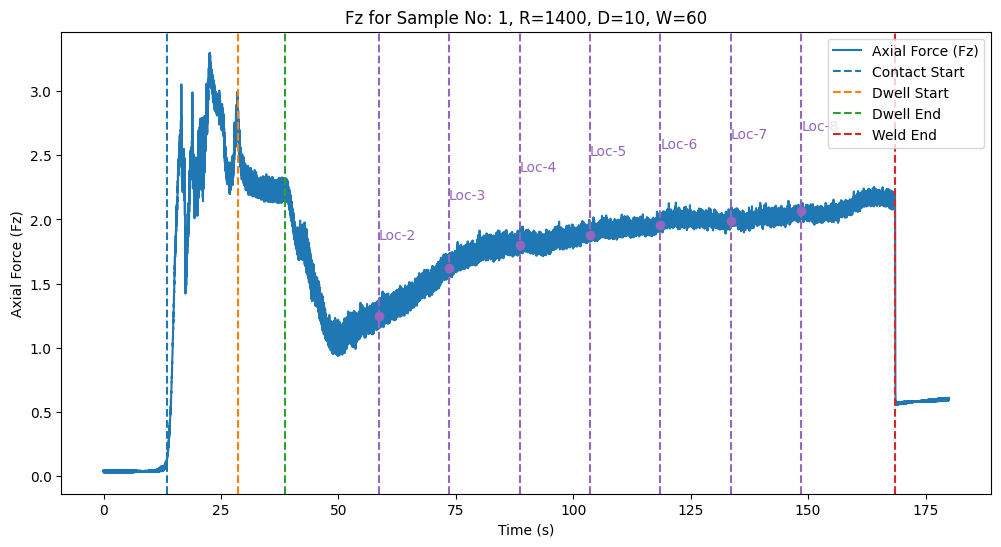

In [48]:
sample_no = 1

cp = sns.color_palette(n_colors=5)

# Extract relevant data
af = afs.loc[afs["sample_no"] == sample_no].reset_index(drop=True)
af.set_index("Time", inplace=True)
info = comb[comb["sample_no"] == sample_no].iloc[0]
R = metas[metas["sample_no"] == sample_no]["R"].values[0]
D = metas[metas["sample_no"] == sample_no]["D"].values[0]
W = metas[metas["sample_no"] == sample_no]["W"].values[0]

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(af.index, af["Fz"], label="Axial Force (Fz)")
ax.axvline(
    info["contact_time_start"], color=cp[0], linestyle="--", label="Contact Start"
)
ax.axvline(info["dwell_time_start"], color=cp[1], linestyle="--", label="Dwell Start")
ax.axvline(info["dwell_time_end"], color=cp[2], linestyle="--", label="Dwell End")
ax.axvline(info["weld_time_end"], color=cp[3], linestyle="--", label="Weld End")

for i in range(1, 8):
    col_name_time = f"LOC{i}_time"
    col_name_idx = f"LOC{i}_idx"
    col_name_value = f"LOC{i}_Fz"
    loc_idx = info[col_name_idx]
    loc_value = info[col_name_value]
    ax.axvline(info[col_name_time], color=cp[4], linestyle="--")
    ax.text(
        info[col_name_time],
        af["Fz"].iloc[loc_idx] + af["Fz"].max() * 0.2,
        f"Loc-{i + 1}",
        verticalalignment="center",
        color=cp[4],
        clip_on=True,
    )
    ax.plot(
        af.index[loc_idx],
        loc_value,
        marker="o",
        color=cp[4],
    )

ax.set_title(f"Fz for Sample No: {sample_no}, R={R}, D={D}, W={W}")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Axial Force (Fz)")
ax.legend()
plt.show()

In [49]:
def plot_af(sample_no, file_prefix="S16"):
    # sample_no = 1

    cp = sns.color_palette(n_colors=5)

    # Extract relevant data
    af = afs.loc[afs["sample_no"] == sample_no].reset_index(drop=True)
    af.set_index("Time", inplace=True)
    info = comb[comb["sample_no"] == sample_no].iloc[0]
    R = metas[metas["sample_no"] == sample_no]["R"].values[0]
    D = metas[metas["sample_no"] == sample_no]["D"].values[0]
    W = metas[metas["sample_no"] == sample_no]["W"].values[0]

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(af.index, af["Fz"], label="Axial Force (Fz)")
    ax.axvline(
        info["contact_time_start"], color=cp[0], linestyle="--", label="Contact Start"
    )
    ax.axvline(
        info["dwell_time_start"], color=cp[1], linestyle="--", label="Dwell Start"
    )
    ax.axvline(info["dwell_time_end"], color=cp[2], linestyle="--", label="Dwell End")
    ax.axvline(info["weld_time_end"], color=cp[3], linestyle="--", label="Weld End")

    for i in range(1, 8):
        col_name_time = f"LOC{i}_time"
        col_name_idx = f"LOC{i}_idx"
        col_name_value = f"LOC{i}_Fz"
        loc_idx = info[col_name_idx]
        loc_value = info[col_name_value]
        ax.axvline(info[col_name_time], color=cp[4], linestyle="--")
        ax.text(
            info[col_name_time],
            af["Fz"].iloc[loc_idx] + af["Fz"].max() * 0.2,
            f"Loc-{i + 1}",
            verticalalignment="center",
            color=cp[4],
            clip_on=True,
        )
        ax.plot(
            af.index[loc_idx],
            loc_value,
            marker="o",
            color=cp[4],
        )

    ax.set_title(f"Fz for Sample No: {sample_no}, R={R}, D={D}, W={W}")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Axial Force (Fz)")
    ax.legend()
    fig.tight_layout()
    fig.savefig(
        f"{OUT_DIR}/{file_prefix}_sample_{sample_no}.png", dpi=300, bbox_inches="tight"
    )
    plt.close(fig)
    print(f"Saved plot for sample_no: {sample_no}")
    

In [50]:
for sample_no in comb["sample_no"].tolist():
    plot_af(sample_no)

Saved plot for sample_no: 1
Saved plot for sample_no: 2
Saved plot for sample_no: 3
Saved plot for sample_no: 4
Saved plot for sample_no: 5
Saved plot for sample_no: 6
Saved plot for sample_no: 7
Saved plot for sample_no: 8
Saved plot for sample_no: 9
Saved plot for sample_no: 10
Saved plot for sample_no: 11
Saved plot for sample_no: 12
Saved plot for sample_no: 13
Saved plot for sample_no: 14
Saved plot for sample_no: 15
Saved plot for sample_no: 16
Saved plot for sample_no: 17
Saved plot for sample_no: 18
Saved plot for sample_no: 19
Saved plot for sample_no: 20
Saved plot for sample_no: 21
Saved plot for sample_no: 22
Saved plot for sample_no: 23
Saved plot for sample_no: 24
Saved plot for sample_no: 25
Saved plot for sample_no: 26
Saved plot for sample_no: 27
Saved plot for sample_no: 28
Saved plot for sample_no: 29
Saved plot for sample_no: 30
Saved plot for sample_no: 31
Saved plot for sample_no: 32
Saved plot for sample_no: 33
Saved plot for sample_no: 34
Saved plot for sample_n